In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [7]:
df=pd.read_csv("Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [8]:
df.shape

(13320, 9)

In [11]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [20]:
df.groupby('size')['size'].agg('count').head()

size
1 BHK         538
1 Bedroom     105
1 RK           13
10 BHK          2
10 Bedroom     12
Name: size, dtype: int64

In [191]:
df1 = df.drop(['area_type','society','balcony'], axis='columns')
df1.head()

,availability,location,size,total_sqft,bath,price
0,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Ready To Move,Uttarahalli,3 BHK,1440,2.0,62.00
3,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Ready To Move,Kothanur,2 BHK,1200,2.0,51.00


In [192]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [193]:
df1.isnull().sum()

availability     0
location         1
size            16
total_sqft       0
bath            73
price            0
dtype: int64

In [194]:
# To drop null values or to fill value to that space by average value of that column
df2=df1.dropna()
df2.isnull().sum()

availability    0
location        0
size            0
total_sqft      0
bath            0
price           0
dtype: int64

In [195]:
df2.shape

(13246, 6)

In [196]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [197]:
df2['bhk'] = df2['size'].apply(lambda x : int(x.split(' ')[0])) # To create a new column

C:\Users\sanja\AppData\Local\Temp\ipykernel_14740\3782240644.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bhk'] = df2['size'].apply(lambda x : int(x.split(' ')[0])) # To create a new column


In [198]:
df2.head()

,availability,location,size,total_sqft,bath,price,bhk
0,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Ready To Move,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Ready To Move,Kothanur,2 BHK,1200,2.0,51.00,2


In [199]:
df3=df2.drop(['size'],axis='columns')
df3.head()

,availability,location,total_sqft,bath,price,bhk
0,19-Dec,Electronic City Phase II,1056,2.0,39.07,2
1,Ready To Move,Chikka Tirupathi,2600,5.0,120.00,4
2,Ready To Move,Uttarahalli,1440,2.0,62.00,3
3,Ready To Move,Lingadheeranahalli,1521,3.0,95.00,3
4,Ready To Move,Kothanur,1200,2.0,51.00,2


In [200]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [201]:
df3[df3.bhk == 3]

,availability,location,total_sqft,bath,price,bhk
2,Ready To Move,Uttarahalli,1440,2.0,62.00,3
3,Ready To Move,Lingadheeranahalli,1521,3.0,95.00,3
8,Ready To Move,Marathahalli,1310,3.0,63.25,3
10,18-Feb,Whitefield,1800,2.0,70.00,3
14,Ready To Move,Sarjapur,2250,3.0,148.00,3
...,...,...,...,...,...,...
13307,Ready To Move,Billekahalli,1805,3.0,134.00,3
13308,Ready To Move,Bannerghatta Road,1527,3.0,142.00,3
13309,Ready To Move,Yeshwanthpur,1675,3.0,92.13,3
13313,Ready To Move,Uttarahalli,1345,2.0,57.00,3


In [202]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [203]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,availability,location,total_sqft,bath,price,bhk
30,19-Dec,Yelahanka,2100 - 2850,4.0,186.000,4
122,18-Mar,Hebbal,3067 - 8156,4.0,477.000,4
137,19-Mar,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,18-Dec,Sarjapur,1145 - 1340,2.0,43.490,2
188,Ready To Move,KR Puram,1015 - 1540,2.0,56.800,2
410,Ready To Move,Kengeri,34.46Sq. Meter,1.0,18.500,1
549,18-Sep,Hennur Road,1195 - 1440,2.0,63.770,2
648,Ready To Move,Arekere,4125Perch,9.0,265.000,9
661,Ready To Move,Yelahanka,1120 - 1145,2.0,48.130,2
672,18-Mar,Bettahalsoor,3090 - 5002,4.0,445.000,4


In [204]:
def convert_sqft_to_num(x):
    tokens=x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [205]:
convert_sqft_to_num('2100 - 2850')

2475.0

In [206]:
df4=df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqft_to_num)
df4.head()

,availability,location,total_sqft,bath,price,bhk
0,19-Dec,Electronic City Phase II,1056.0,2.0,39.07,2
1,Ready To Move,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Ready To Move,Uttarahalli,1440.0,2.0,62.00,3
3,Ready To Move,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Ready To Move,Kothanur,1200.0,2.0,51.00,2


In [207]:
df4.loc[30]

availability       19-Dec
location        Yelahanka
total_sqft         2475.0
bath                  4.0
price               186.0
bhk                     4
Name: 30, dtype: object

In [208]:
df5=df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

,availability,location,total_sqft,bath,price,bhk,price_per_sqft
0,19-Dec,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Ready To Move,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Ready To Move,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Ready To Move,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Ready To Move,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [209]:
len(df5.location.unique())

1304

In [210]:
df5.location = df5.location.apply(lambda x : x.strip())
location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [211]:
len(location_stats[location_stats<=10])

1052

In [212]:
loc_stats_less_than_ten = location_stats[location_stats<=10]
loc_stats_less_than_ten

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [213]:
df5.location = df5.location.apply(lambda x: 'other' if x in loc_stats_less_than_ten else x)
len(df5.location.unique())

242

In [214]:
df5.head()

,availability,location,total_sqft,bath,price,bhk,price_per_sqft
0,19-Dec,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Ready To Move,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Ready To Move,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Ready To Move,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Ready To Move,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [215]:
df5[df5.total_sqft/df5.bhk<300].head()

,availability,location,total_sqft,bath,price,bhk,price_per_sqft
9,Ready To Move,other,1020.0,6.0,370.0,6,36274.509804
45,Ready To Move,HSR Layout,600.0,9.0,200.0,8,33333.333333
58,Ready To Move,Murugeshpalya,1407.0,4.0,150.0,6,10660.980810
68,Ready To Move,Devarachikkanahalli,1350.0,7.0,85.0,8,6296.296296
70,Ready To Move,other,500.0,3.0,100.0,3,20000.000000


In [216]:
df5.shape

(13246, 7)

In [217]:
df6=df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(12502, 7)

In [218]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [219]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        sd=np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft > (m-sd)) & (subdf.price_per_sqft > (m+sd))]
        df_out = pd.concat([df_out, reduced_df], ignore_index = True)
    return df_out
df7 = remove_pps_outliers(df6)
df7.shape

(1422, 7)

In [220]:
df7[df7.location == 'Uttarahalli']

,availability,location,total_sqft,bath,price,bhk,price_per_sqft
1044,Ready To Move,Uttarahalli,1310.0,2.0,85.0,3,6488.549618
1045,Ready To Move,Uttarahalli,1315.0,2.0,74.0,3,5627.376426
1046,Ready To Move,Uttarahalli,1280.0,2.0,75.0,2,5859.375000
1047,Ready To Move,Uttarahalli,1235.0,2.0,90.0,2,7287.449393
1048,Ready To Move,Uttarahalli,3600.0,6.0,303.0,6,8416.666667
1049,Ready To Move,Uttarahalli,1200.0,4.0,179.0,4,14916.666667
1050,Ready To Move,Uttarahalli,1163.0,2.0,68.0,2,5846.947549
1051,Ready To Move,Uttarahalli,1150.0,2.0,70.0,2,6086.956522
1052,Ready To Move,Uttarahalli,1099.0,2.0,65.0,2,5914.467698
1053,Ready To Move,Uttarahalli,1200.0,4.0,155.0,4,12916.666667


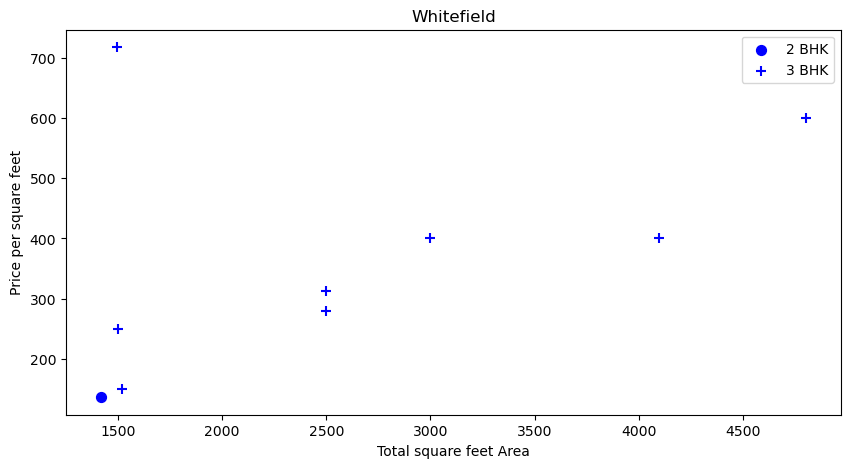

In [221]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location)&(df.bhk==2)]
    bhk3 = df[(df.location==location)&(df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (10,5)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker = '+', color='blue',label='3 BHK', s=50)
    plt.xlabel("Total square feet Area")
    plt.ylabel('Price per square feet')
    plt.title(location)
    plt.legend()
   
plot_scatter_chart(df7,"Whitefield")

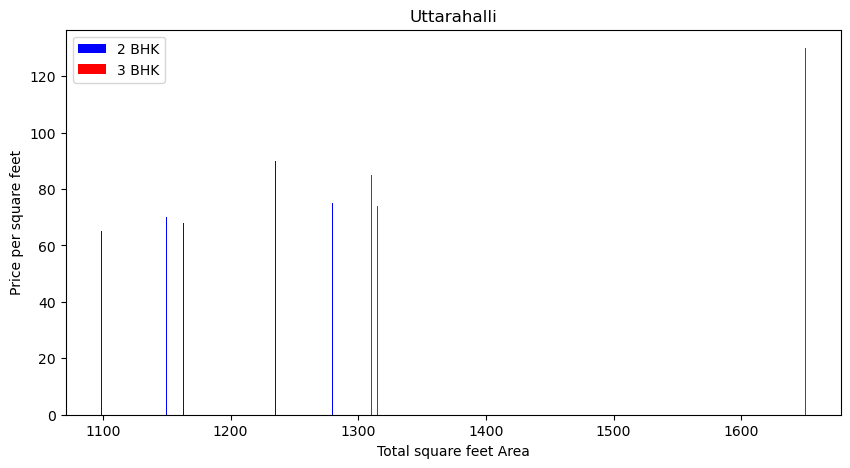

In [222]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location)&(df.bhk==2)]
    bhk3 = df[(df.location==location)&(df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (10,5)
    plt.bar(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK')
    plt.bar(bhk3.total_sqft,bhk3.price, color='red',label='3 BHK')
    plt.xlabel("Total square feet Area")
    plt.ylabel('Price per square feet')
    plt.title(location)
    plt.legend()
   
plot_scatter_chart(df7,"Uttarahalli")

In [223]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean':np.mean(bhk_df.price_per_sqft),
                'std' : np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats.get('count') > 5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

df8 = remove_bhk_outliers(df7)
df8.shape

(1214, 7)

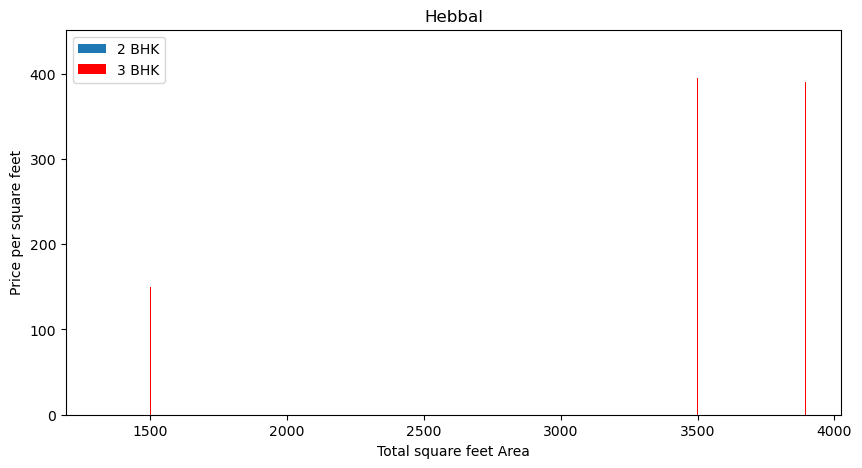

In [224]:
plot_scatter_chart(df7,"Hebbal")


Text(0, 0.5, 'count')

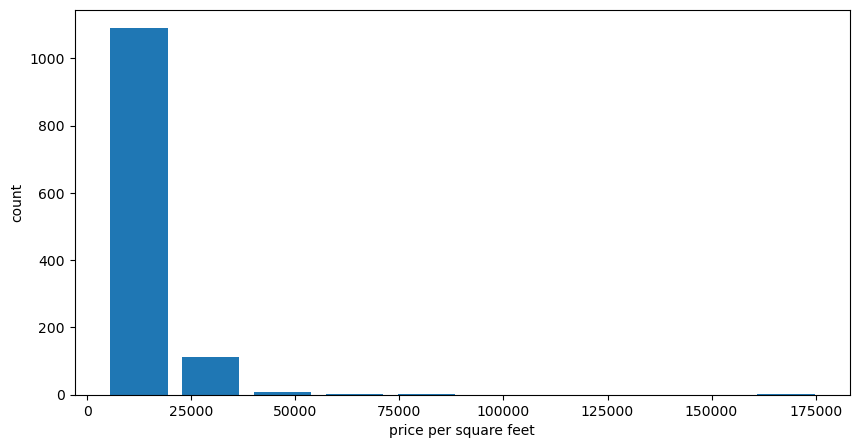

In [225]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10,5)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("price per square feet")
plt.ylabel("count")

In [226]:
df8.bhk.unique()

array([ 4,  5,  1,  3,  2,  6,  7,  8,  9, 10], dtype=int64)

In [227]:
df8[df8.bhk==10]

,availability,location,total_sqft,bath,price,bhk,price_per_sqft
674,Ready To Move,Kogilu,3280.0,9.0,450.0,10,13719.512195
1410,Ready To Move,other,7150.0,13.0,3600.0,10,50349.650350


Text(0, 0.5, 'count')

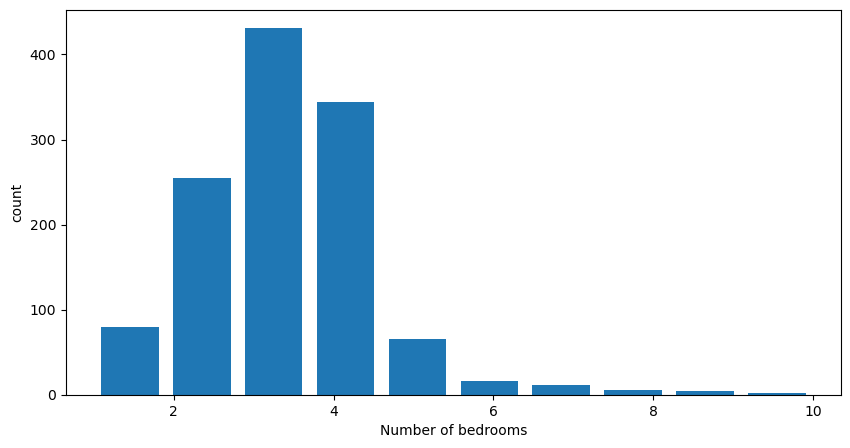

In [228]:
plt.hist(df8.bhk, rwidth=0.8)
plt.xlabel('Number of bedrooms')
plt.ylabel('count')

In [229]:
df9=df8[df8.price>df8.bhk+2]
df9.shape

(1214, 7)

In [230]:
df10=df9.drop(['price_per_sqft','availability'], axis='columns')
df10.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2400.0,4.0,450.0,4
1,1st Phase JP Nagar,2200.0,7.0,350.0,5
2,1st Phase JP Nagar,1200.0,4.0,300.0,4
3,1st Phase JP Nagar,1900.0,3.0,400.0,4
4,2nd Phase Judicial Layout,525.0,1.0,26.0,1


In [233]:
dummies=pd.get_dummies(df10.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [235]:
df11=pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
df11.head(3)

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2400.0,4.0,450.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Phase JP Nagar,2200.0,7.0,350.0,5,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Phase JP Nagar,1200.0,4.0,300.0,4,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [236]:
df12 = df11.drop('location', axis='columns')
df12.head(3)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2400.0,4.0,450.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2200.0,7.0,350.0,5,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,4.0,300.0,4,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [237]:
df12.shape

(1214, 245)

In [239]:
x=df12.drop('price', axis='columns')
x.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2400.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2200.0,7.0,5,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,4.0,4,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1900.0,3.0,4,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,525.0,1.0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [240]:
y = df12.price
y.head()

0    450.0
1    350.0
2    300.0
3    400.0
4     26.0
Name: price, dtype: float64

In [246]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [247]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(x_train, y_train)
lr_clf.score(x_test, y_test)

0.6644140225905926

In [249]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv=ShuffleSplit(n_splits=4,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),x,y,cv=cv)

array([-1.65811941e+16,  7.22904770e-01, -1.27829781e+19,  7.27570374e-01])